#  Homework 2

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, Febrary 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm
from IPython.display import Image
%matplotlib inline

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (steroids) (with appropriately chosen parameters)
- importance sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)

Monte Carlo estimation= 0.0589490460824
MC mean using inverse transform sampling 0.0588722469697
Standard deviation mean using inverse transform sampling 0.000146169747809


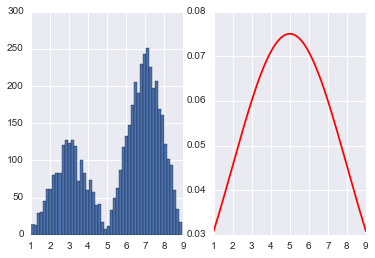

In [4]:
## Problem 1-1 inverse transform sampling
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

xmin = 1; xmax = 9;
invCDF = lambda r: -np.log(1-r)
def inv_cdf(p):
    if p >= 0 and p < 1/6:
        return np.sqrt(24*p)+1
    elif p >= 1/6 and p < 1/3:
        return 5-np.sqrt(8-24*p)
    elif p >= 1/3 and p < 2/3:
        return np.sqrt(12*p-4)+5
    else: ## p >= 2/3 and p <= 1:
        return 9-np.sqrt(12-12*p)

times = 100
Imcs = np.zeros(times)
for i in range(times):
    N = 5000; # the total of samples we wish to generate
    P = np.random.uniform(0, 1, N)
    X = [inv_cdf(p) for p in P]
    H = [h(x) for x in X]
    Imc= np.sum(H)/ N; ## Monte Carlo estimation
    Imcs[i] = Imc

plt.subplot(1,2,1)
plt.hist(X, bins = 50, label = u"Samples")

X_H = np.linspace(xmin, xmax, 500)
plt.subplot(1,2,2)
plt.plot(X_H, h(X_H), "r", label = u"H(x)")

print("Monte Carlo estimation=",Imc)
print("MC mean using inverse transform sampling", np.mean(Imcs))
print("Standard deviation mean using inverse transform sampling", np.std(Imcs))

Monte Carlo estimation= 0.0587848528849
MC mean using rejection sampling with uniform proposal distribution 0.0588764908929
Standard deviation mean using rejection sampling with uniform proposal distribution 0.000135893823885
Count 15149 Accepted 5000


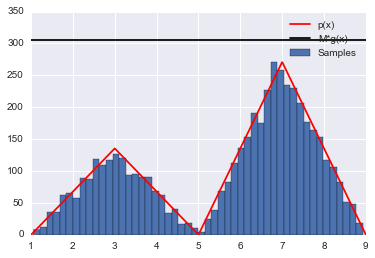

In [5]:
# Problem 1-2(1) rejection sampling with uniform proposal distribution
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

def p(x):  # our distribution
    if x>=1 and x<3:
        return (x-1)/12
    elif x>=3 and x<5:
        return -(x-5)/12
    elif x>=5 and x<7:
        return (x-5)/6
    elif x>=7 and x<9:
        return -(x-9)/6
    else:
        return 0;    

# domain limits
xmin = 1; xmax = 9
g = 1/(xmax - xmin)  # our proposal pdf 
M = 3
cdf_g = lambda x: g*(x-1) # CDF of our proposal pdf
inv_cdf_g = lambda x: x/g+1# generates our proposal using inverse sampling

times = 100
Imcs = np.zeros(times)
for i in range(times):
    N = 5000 # the total of samples we wish to generate
    accepted = 0 # the number of accepted samples
    samples = np.zeros(N)
    count = 0 # the total count of proposals

    # generation loop
    while (accepted < N):

        # Sample from g using inverse sampling
        u = np.random.uniform(0, 1)
        xproposal = inv_cdf_g(u)
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if y < p(xproposal)/(M*g):
            samples[accepted] = xproposal
            accepted += 1

        count +=1
    H = [h(x) for x in samples]
    Imc= np.sum(H)/ N; #Monte Carlo estimation
    Imcs[i] = Imc

print("Monte Carlo estimation=",Imc)
print("MC mean using rejection sampling with uniform proposal distribution", np.mean(Imcs))
print("Standard deviation mean using rejection sampling with uniform proposal distribution", np.std(Imcs))


print("Count", count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples');
# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, np.max(hinfo[0])*M*np.array([p(x) for x in xvals]), 'r', label=u'p(x)')
plt.plot(xvals, np.max(hinfo[0])*M*np.array([M*g for x in xvals]), 'k', label=u'M*g(x)')

# turn on the legend
plt.legend()




Monte Carlo estimation= 0.0586346802894
MC mean using rejection sampling with normal proposal distribution 0.0588638384111
Standard deviation mean using rejection sampling with normal proposal distribution 0.000157754617485


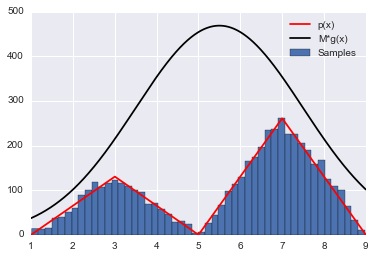

In [8]:
# Problem 1-2(2) rejection sampling with normal proposal distribution (steroids) 
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

def p(x):  # our distribution
    if x>=1 and x<3:
        return (x-1)/12
    elif x>=3 and x<5:
        return -(x-5)/12
    elif x>=5 and x<7:
        return (x-5)/6
    elif x>=7 and x<9:
        return -(x-9)/6
    else:
        return 0;  
    
mu = 5.5;
sigma = 2;
M = 3
def g(x):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
def cdf_g(x):
    return norm.cdf((x - mu)/sigma)
def inv_cdf_g(x):
    return norm.ppf(x) * sigma + mu

xmin = 1; xmax = 9
pmin = cdf_g(xmin); pmax = cdf_g(xmax)

times = 100
Imcs = np.zeros(times)
for i in range(times):
    N = 5000;
    accepted = 0;
    samples = np.zeros(N)
    count = 0;
    while (accepted < N):
        u = np.random.uniform(pmin, pmax)
        xproposal = inv_cdf_g(u)
        y = np.random.uniform(0, 1)

        if y < p(xproposal)/(M*g(xproposal)) :
            samples[accepted] = xproposal
            accepted+=1
        count+=1 
        
    H = [h(x) for x in samples]
    Imc= np.sum(H)/ N; #Monte Carlo estimation
    Imcs[i] = Imc

print("Monte Carlo estimation=", Imc)
print("MC mean using rejection sampling with normal proposal distribution", np.mean(Imcs))
print("Standard deviation mean using rejection sampling with normal proposal distribution", np.std(Imcs))
plt.hist(samples, bins=50, label=u"Samples")
hinfo = np.histogram(samples, 50)
xvals = np.linspace(xmin, xmax, 1000)
plt.plot(xvals, np.max(hinfo[0])*M*np.array([p(x) for x in xvals]), 'r', label=u'p(x)')
plt.plot(xvals, np.max(hinfo[0])*M*M*np.array([g(x) for x in xvals]), 'k', label=u'M*g(x)')
plt.legend()

Monte Carlo estimation= 0.0588878670603
MC mean using importance sampling with uniform proposal distribution 0.0588638637681
Standard deviation mean using importance sampling with uniform proposal distribution 0.000130343598389


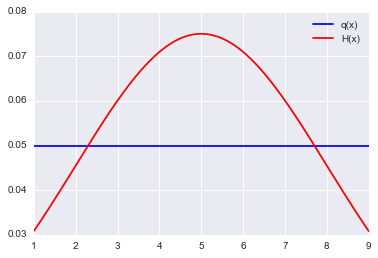

In [9]:
# Problem 1-3(1) importance sampling with normal proposal distribution
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

def p(x):  # our distribution
    if x>=1 and x<3:
        return (x-1)/12
    elif x>=3 and x<5:
        return -(x-5)/12
    elif x>=5 and x<7:
        return (x-5)/6
    elif x>=7 and x<9:
        return -(x-9)/6
    else:
        return 0;    

# domain limits
xmin = 1; xmax = 9
q = 0.05  # our proposal pdf 

Xs = np.linspace(xmin, xmax, 500)
plt.plot(Xs, q*np.ones(500), "b", label = u"q(x)")
plt.plot(Xs, h(X_H), "r", label = u"H(x)")
plt.legend()

times = 100
Imcs = np.zeros(times)
for i in range(times):
    N = 5000;
    X = np.random.uniform(xmin, xmax, N)
    nominator = [h(x)*p(x)/q for x in X]
    denominator = [p(x)/q for x in X]
    Imc= np.sum(nominator)/ np.sum(denominator); ## Monte Carlo estimation
    Imcs[i] = Imc
    
print("Monte Carlo estimation=",Imc)
print("MC mean using importance sampling with uniform proposal distribution", np.mean(Imcs))
print("Standard deviation mean using importance sampling with uniform proposal distribution", np.std(Imcs))


Monte Carlo estimation= 0.058365295645
MC mean using importance sampling with normal proposal distribution 0.0581463799438
Standard deviation mean using importance sampling with normal proposal distribution 0.000152653735522


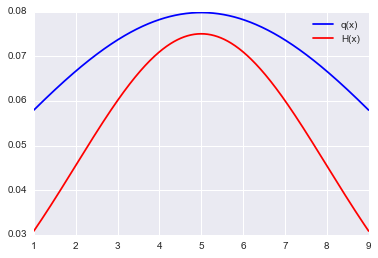

In [17]:
# Problem 1-3(2) importance sampling with uniform proposal distribution
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

def p(x):  # our distribution
    if x>=1 and x<3:
        return (x-1)/12
    elif x>=3 and x<5:
        return -(x-5)/12
    elif x>=5 and x<7:
        return (x-5)/6
    elif x>=7 and x<9:
        return -(x-9)/6
    else:
        return 0;    

# domain limits
xmin = 1; xmax = 9

mu = 5;
sigma = 5;
def q(x):  # our proposal pdf 
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
Xs = np.linspace(xmin, xmax, 500)
plt.plot(Xs, q(Xs), "b", label = u"q(x)")
plt.plot(Xs, h(X_H), "r", label = u"H(x)")
plt.legend()

times = 100
Imcs = np.zeros(times)
for i in range(times):
    N = 5000;
    X = np.random.uniform(xmin, xmax, N)
    nominator = [h(x)*p(x)/q(x) for x in X]
    denominator = [p(x)/q(x) for x in X]
    Imc= np.sum(nominator)/ np.sum(denominator); ## Monte Carlo estimation
    Imcs[i] = Imc

print("Monte Carlo estimation=",Imc)
print("MC mean using importance sampling with normal proposal distribution", np.mean(Imcs))
print("Standard deviation mean using importance sampling with normal proposal distribution", np.std(Imcs))

## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Based on the discussion on sampling methods in lecture, which sampling methods, proposal distributions is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as an ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

Read more about Stratified Sampling:

1. [Variance Reduction Techniques Slides](http://www.sta.nus.edu.sg/~zhangjt/teaching/ST4231/lectures/chapter4.pdf)

2. [Monte Carlo Methods](http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf)

3. [Variance Reduction Techniques Chapter](http://sas.uwaterloo.ca/~dlmcleis/s906/chapt4.pdf)

### Problem 2 Part A My Answer

In [18]:
from ipywidgets import *
df = pd.DataFrame({"method":["inverse transform", "rejection sampling", "rejection sampling", "importance sampling", "importance sampling"], "proposal distribution":["-", "uniform", "normal", "uniform", "normal"], "mean":[0.0588722469697, 0.0588764908929, 0.0588638384111, 0.0588638637681, 0.0581463799438], "std":[0.000146169747809, 0.000135893823885, 0.000157754617485, 0.000130343598389, 0.000152653735522]})
df["variance"] = df["std"]**2
df

,mean,method,proposal distribution,std,variance
0,0.058872,inverse transform,-,0.000146,2.136560e-08
1,0.058876,rejection sampling,uniform,0.000136,1.846713e-08
2,0.058864,rejection sampling,normal,0.000158,2.488652e-08
3,0.058864,importance sampling,uniform,0.000130,1.698945e-08
4,0.058146,importance sampling,normal,0.000153,2.330316e-08


From theoretical calculation, we expect importance sampling	method result in smaller variances. And the result aligns with the expectation. normal proposal distribution's variances vary on different $\mu$ and $\sigma$. Since I use the relatively large sigma, the variance of normal proposal distribution are relatively large.

### Problem 2 Part B My Answer

#### (1)
I would like to natually divide the domain of X according to the break point of x's pdf f(x), that is to say, into 2 segments, each of which has a peak similar to normal distribution.
$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

#### (2) Stratified Sampling, using rejection sampling using a normal proposal distribution

Monte Carlo estimation= 0.0588430451807
MC mean of Stratified Sampling, using rejection sampling with normal proposal distribution 0.0588534198777
Standard deviation mean of Stratified Sampling, using rejection sampling with normal proposal distribution 0.000100075571037


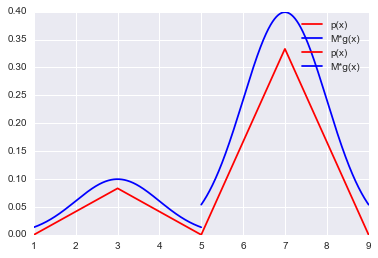

In [48]:
def h(x):
    return 1/(3*np.sqrt(2)*np.pi)*np.exp(-(x - 5)**2/18)

def p(x):  # our distribution
    if x>=1 and x<3:
        return (x-1)/12
    elif x>=3 and x<5:
        return -(x-5)/12
    elif x>=5 and x<7:
        return (x-5)/6
    elif x>=7 and x<9:
        return -(x-9)/6
    else:
        return 0;  
    
N_seg = 2
mu = [3, 7];
sigma = [1, 1];
M = [0.5, 1]
def g(x, seg):
    return 1/np.sqrt(2*np.pi*sigma[seg]**2)*np.exp(-(x-mu[seg])**2/(2*sigma[seg]**2))
def cdf_g(x,seg):
    return norm.cdf((x - mu[seg])/sigma[seg])
def inv_cdf_g(x,seg):
    return norm.ppf(x) * sigma[seg] + mu[seg]

xmin = [1, 5]
xmax = [5, 9]


times = 100
MCs = np.zeros(times)
for i in range(times):
    N = 5000
    Imc = np.zeros(N_seg)
    for seg in range(N_seg):
        accepted = 0
        samples = np.zeros(N)
        count = 0
        pmin = cdf_g(xmin[seg],seg); pmax = cdf_g(xmax[seg],seg)
        while (accepted < N):
            u = np.random.uniform(pmin, pmax)
            xproposal = inv_cdf_g(u, seg)
            y = np.random.uniform(0, 1)

            if y < p(xproposal)/(M[seg]*g(xproposal, seg)) :
                samples[accepted] = xproposal
                accepted+=1
            count+=1        
        H = [h(x) for x in samples]
        Imc[seg]= np.sum(H)/ N; #Monte Carlo estimation

    MC = Imc[0]*1/3 + Imc[1]*2/3
    MCs[i] = MC
print("Monte Carlo estimation=", MC)
print("MC mean of Stratified Sampling, using rejection sampling with normal proposal distribution", np.mean(MCs))
print("Standard deviation mean of Stratified Sampling, using rejection sampling with normal proposal distribution", np.std(MCs))
for seg in range(2):
    xvals = np.linspace(xmin[seg], xmax[seg], 1000)
    plt.plot(xvals, M[seg]*np.array([p(x) for x in xvals]), 'r', label=u'p(x)')
    plt.plot(xvals, M[seg]**2*np.array([g(x, seg) for x in xvals]), 'b', label=u'M*g(x)')
plt.legend()

#### (3) stratified sampling variance comparation

In [50]:
from ipywidgets import *
df = pd.DataFrame({"method":["inverse transform", "rejection sampling", "rejection sampling", "importance sampling", "importance sampling", "stratified rejection sampling"], "proposal distribution":["-", "uniform", "normal", "uniform", "normal", "normal"], "mean MC":[0.0588722469697, 0.0588764908929, 0.0588638384111, 0.0588638637681, 0.0581463799438, 0.0588534198777], "std":[0.000146169747809, 0.000135893823885, 0.000157754617485, 0.000130343598389, 0.000152653735522, 0.000100075571037]})
df["variance"] = df["std"]**2
df

,mean MC,method,proposal distribution,std,variance
0,0.058872,inverse transform,-,0.000146,2.136560e-08
1,0.058876,rejection sampling,uniform,0.000136,1.846713e-08
2,0.058864,rejection sampling,normal,0.000158,2.488652e-08
3,0.058864,importance sampling,uniform,0.000130,1.698945e-08
4,0.058146,importance sampling,normal,0.000153,2.330316e-08
5,0.058853,stratified rejection sampling,normal,0.000100,1.001512e-08


Compared with the unstratified method, the stratified rejection sampling method make the variance shrink to 1.001512e-8, least than half of the variance of normal rejection sampling.